# YouTube Recommendation System's Evolutionary Dynamics

## Imports

In [1]:
from recommendation_systems_evolutionary_dynamics import EGT
import numpy as np
import matplotlib.pylab as plt

In [549]:
strategies_countss = [[25, 25], [25, 25], [25, 25]]

actions_names = [["Low", "High"], ["Low", "High"], ["Low", "High"]]

players_names = ["Consumer", "Platform", "Provider"]
actions_symbols = [["L", "H"], ["L", "H"], ["L", "H"]]

a = 0.2
rl = 0.2
rh = 0.1
br = 0.4 # 0.4 or 0.2 or 0.0
cl = 0.0 # 0 or 0.05
ch = 0.0 # 0 or 0.15

# br < a | br = a | a < br 
# cl < ch < a
# rh < rl

payoff_view_count = {
    (0, 0, 0): [rl,  a-br,  a-cl],  
    (0, 0, 1): [0,  0,  -ch],   
    (0, 1, 0): [0, 0,  -cl],   
    (0, 1, 1): [0,  0,  -ch],   
    
    (1, 0, 0): [0, -br,  -cl],   
    (1, 0, 1): [0, 0,  -ch],   
    (1, 1, 0): [0, 0,  -cl],    
    (1, 1, 1): [rh, a,  a-ch]    
}



strategies_countss = [[25, 25, 25, 25], [25, 25], [25, 25]]
actions_names = [["Low", "High", "Bad Exp", "Good Exp"], ["Low", "High"], ["Low", "High"]]
actions_symbols = [["L", "H", "B", "G"], ["L", "H"], ["L", "H"]]

a = 0.2
rl = 0.2 # 0.2
rh = 0.1 # 0.1
br = 0.0 # 0.4 or 0.2 or 0.0
cl = 0.0 # 0.05
ch = 0.0 # 0.15
ul = 0.0 # 0.2 
uh = 0.0 # 0.4
sp = 0.0 # 0.0 or 0.4
r = 0.8
# a < br < r
# cl < ch < a <= sp
# rh < rl = ul < uh


payoff_view_count2 = {
    (0, 0, 0): [rl, a-br,  a-cl],  
    (0, 0, 1): [0,  0,  -ch],   
    (0, 1, 0): [0, 0,  -cl],   
    (0, 1, 1): [0,  0,  -ch],   

    (1, 0, 0): [0, -br,  -cl],  
    (1, 0, 1): [0, 0,  -ch],   
    (1, 1, 0): [0, 0,  -cl],   
    (1, 1, 1): [rh, a,  a-ch], 
    
    (2, 0, 0): [rl+ul, a-br,  a-cl],  
    (2, 0, 1): [0,  0,  -ch],   
    (2, 1, 0): [0, 0,  -cl],   
    (2, 1, 1): [0,  0,  -ch],   
    
    (3, 0, 0): [0, -br,  -cl],   
    (3, 0, 1): [0, 0,  -ch],   
    (3, 1, 0): [0, 0,  -cl],   
    (3, 1, 1): [rh+uh, a,  a-ch] 
}


payoff_watch_time2 = {
    (0, 0, 0): [rl, a-br,  a-cl],  
    (0, 0, 1): [0,  0,  -ch],   
    (0, 1, 0): [0, 0,  -cl],   
    (0, 1, 1): [0,  0,  -ch],   

    (1, 0, 0): [0, -br,  -cl],  
    (1, 0, 1): [0, 0,  -ch],   
    (1, 1, 0): [0, 0,  -cl],   
    (1, 1, 1): [rh, a,  a-ch], 
    
    (2, 0, 0): [rl+ul, a-br,  r+a-cl],  
    (2, 0, 1): [0,  0,  -ch],   
    (2, 1, 0): [0, 0,  -cl],   
    (2, 1, 1): [0,  0,  -ch],   
    
    (3, 0, 0): [0, -br,  -cl],   
    (3, 0, 1): [0, 0,  -ch],   
    (3, 1, 0): [0, 0,  -cl],   
    (3, 1, 1): [rh+uh, a,  r+sp+a-ch] 
}

payoff_watch_time_rec_view_count_ads = {
    (0, 0, 0): [rl, a-br,  -cl],  
    (0, 0, 1): [0,  0,  -ch],   
    (0, 1, 0): [0, 0,  -cl],   
    (0, 1, 1): [0,  0,  -ch],   

    (1, 0, 0): [0, -br,  -cl],  
    (1, 0, 1): [0, 0,  -ch],   
    (1, 1, 0): [0, 0,  -cl],   
    (1, 1, 1): [rh, 0,  -ch], 
    
    (2, 0, 0): [rl+ul, a-br+r,  a-cl],  
    (2, 0, 1): [0,  0,  -ch],   
    (2, 1, 0): [0, 0,  -cl],   
    (2, 1, 1): [0,  0,  -ch],   
    
    (3, 0, 0): [0, a-br,  -cl],   
    (3, 0, 1): [0, 0,  -ch],   
    (3, 1, 0): [0, 0,  -cl],   
    (3, 1, 1): [rh+uh, a+r,  sp+a-ch] 
}



payoff_borderline_content = {
    (0, 0, 0): [rl, a-br,  -cl],  
    (0, 0, 1): [0,  0,  -ch],   
    (0, 1, 0): [0, 0,  -cl],   
    (0, 1, 1): [0,  0,  -ch],   

    (1, 0, 0): [0, -br,  -cl],  
    (1, 0, 1): [0, 0,  -ch],   
    (1, 1, 0): [0, 0,  -cl],   
    (1, 1, 1): [rh, 0,  -ch], 
    
    (2, 0, 0): [rl+ul, a-br+r,  a-cl],  
    (2, 0, 1): [0,  0,  -ch],   
    (2, 1, 0): [0, 0,  -cl],   
    (2, 1, 1): [0,  0,  -ch],   
    
    (3, 0, 0): [0, -br,  -cl],   
    (3, 0, 1): [0, 0,  -ch],   
    (3, 1, 0): [0, 0,  -cl],   
    (3, 1, 1): [rh+uh, a+r,  sp+a-ch] 
}

#a = 0.4

"""payoff_watch_time_rec_watch_time_ads = { 
    (0, 0, 0): [rl, -br,  -cl],  
    (0, 0, 1): [0,  0,  -ch],   
    (0, 1, 0): [0, 0,  -cl],   
    (0, 1, 1): [0,  0,  -ch],   

    (1, 0, 0): [0, -br,  -cl],  
    (1, 0, 1): [0, 0,  -ch],   
    (1, 1, 0): [0, 0,  -cl],   
    (1, 1, 1): [rh, 0,  -ch], 
    
    (2, 0, 0): [rl+ul, a-br+r,  a-cl],  
    (2, 0, 1): [0,  0,  -ch],   
    (2, 1, 0): [0, 0,  -cl],   
    (2, 1, 1): [0,  0,  -ch],   
    
    (3, 0, 0): [0, -br,  -cl],   
    (3, 0, 1): [0, 0,  -ch],   
    (3, 1, 0): [0, 0,  -cl],   
    (3, 1, 1): [rh+uh, a+r,  sp+a-ch] 
}"""


#m = 0.1
#sl =  0.1
#sh =  0.2
#hr = 0.8
payoff_valued_watch_time = { 
    (0, 0, 0): [m, 0,  -cl],  
    (0, 0, 1): [0,  0,  -ch],   
    (0, 1, 0): [0, 0,  -cl],   
    (0, 1, 1): [0,  0,  -ch],   

    (1, 0, 0): [0, 0,  -cl],  
    (1, 0, 1): [0, 0,  -ch],   
    (1, 1, 0): [0, 0,  -cl],   
    (1, 1, 1): [m, 0,  -ch], 
    
    (2, 0, 0): [m+sl, a+r,  sp+a-cl],  
    (2, 0, 1): [0,  0,  -ch],   
    (2, 1, 0): [0, 0,  -cl],   
    (2, 1, 1): [0,  0,  -ch],   
    
    (3, 0, 0): [0, 0,  -cl],   
    (3, 0, 1): [0, 0,  -ch],   
    (3, 1, 0): [0, 0,  -cl],   
    (3, 1, 1): [m+sh, a+r+hr,  sp+a-ch] 
}


payoff_matrix = payoff_view_count2

game = EGT.Game(strategies_countss=strategies_countss, payoff_matrix=payoff_matrix, actions_names=actions_names, players_names=players_names)

Ps = game.get_populations()
for i, P in enumerate(Ps):
    print(f"P{i}: {np.unique_counts(P)}")
print(game.get_payoff_matrix())

[['Low', 'High', 'Bad Exp', 'Good Exp'], ['Low', 'High'], ['Low', 'High']] [[0.25, 0.25, 0.25, 0.25], [0.5, 0.5], [0.5, 0.5]]
P0: UniqueCountsResult(values=array([0, 1, 2, 3]), counts=array([25, 25, 25, 25]))
P1: UniqueCountsResult(values=array([0, 1]), counts=array([25, 25]))
P2: UniqueCountsResult(values=array([0, 1]), counts=array([25, 25]))
{(0, 0, 0): [0.2, 0.2, 0.2], (0, 0, 1): [0, 0, -0.0], (0, 1, 0): [0, 0, -0.0], (0, 1, 1): [0, 0, -0.0], (1, 0, 0): [0, -0.0, -0.0], (1, 0, 1): [0, 0, -0.0], (1, 1, 0): [0, 0, -0.0], (1, 1, 1): [0.1, 0.2, 0.2], (2, 0, 0): [0.2, 0.2, 0.2], (2, 0, 1): [0, 0, -0.0], (2, 1, 0): [0, 0, -0.0], (2, 1, 1): [0, 0, -0.0], (3, 0, 0): [0, -0.0, -0.0], (3, 0, 1): [0, 0, -0.0], (3, 1, 0): [0, 0, -0.0], (3, 1, 1): [0.1, 0.2, 0.2]}


## Initialize Game
1. Strategies counts for each populations (imiplicitly defining populations sizes)
2. actions names
3. players names
4. payoff matrix

In [528]:
strategies_countss = [[25, 25, 25, 25], [25, 25], [25, 25]]
actions_names = [["Low", "High", "Bad Exp", "Good Exp"], ["Low", "High"], ["Low", "High"]]
actions_symbols = [["L", "H", "B", "G"], ["L", "H"], ["L", "H"]]

a = 0.2
rl = 0.2 # 0.2
rh = 0.1 # 0.1
br = 0.0 # 0.4 or 0.2 or 0.0
cl = 0.05 # 0.05
ch = 0.15 # 0.15
ul = 0.2 # 0.2 
uh = 0.4 # 0.4

payoff_view_count = {
    (0, 0, 0): [rl, a-br,  a-cl],  
    (0, 0, 1): [0,  0,  -ch],   
    (0, 1, 0): [0, 0,  -cl],   
    (0, 1, 1): [0,  0,  -ch],   

    (1, 0, 0): [0, -br,  -cl],  
    (1, 0, 1): [0, 0,  -ch],   
    (1, 1, 0): [0, 0,  -cl],   
    (1, 1, 1): [rh, a,  a-ch], 
    
    (2, 0, 0): [rl+ul, a-br,  a-cl],  
    (2, 0, 1): [0,  0,  -ch],   
    (2, 1, 0): [0, 0,  -cl],   
    (2, 1, 1): [0,  0,  -ch],   
    
    (3, 0, 0): [0, -br,  -cl],   
    (3, 0, 1): [0, 0,  -ch],   
    (3, 1, 0): [0, 0,  -cl],   
    (3, 1, 1): [rh+uh, a,  a-ch] 
}


a = 0.2
rl = 0.2 # 0.2
rh = 0.1 # 0.1
cl = 0.05 # 0.05
ch = 0.15 # 0.15
ul = 0.2 # 0.2 or -0.2 
uh = 0.8 # 0.4 or 0.8
r = 0.8

payoff_watch_time = {
    (0, 0, 0): [rl, a,  a-cl],  
    (0, 0, 1): [0,  0,  -ch],   
    (0, 1, 0): [0, 0,  -cl],   
    (0, 1, 1): [0,  0,  -ch],   

    (1, 0, 0): [0, 0,  -cl],  
    (1, 0, 1): [0, 0,  -ch],   
    (1, 1, 0): [0, 0,  -cl],   
    (1, 1, 1): [rh, a,  a-ch], 
    
    (2, 0, 0): [rl+ul, a+r,  a-cl],  
    (2, 0, 1): [0,  0,  -ch],   
    (2, 1, 0): [0, 0,  -cl],   
    (2, 1, 1): [0,  0,  -ch],   
    
    (3, 0, 0): [0, 0,  -cl],   
    (3, 0, 1): [0, 0,  -ch],   
    (3, 1, 0): [0, 0,  -cl],   
    (3, 1, 1): [rh+uh, a+r,  a-ch] 
}


a = 0.2
s = 0.1 # 0.1
ul = 0.2 # 0.2 
uh = 0.4 # 0.4
r1 = 0.0
r2 = 0.8

payoff_valued_watch_time = {
    (0, 0, 0): [s, a,  a],  
    (0, 0, 1): [0,  0,  0],   
    (0, 1, 0): [0, 0,  0],   
    (0, 1, 1): [0,  0,  0],   

    (1, 0, 0): [0, 0,  0],  
    (1, 0, 1): [0, 0,  0],   
    (1, 1, 0): [0, 0,  0],   
    (1, 1, 1): [s, a+r2,  a], 
    
    (2, 0, 0): [s+ul, a+r1,  a],  
    (2, 0, 1): [0,  0,  0],   
    (2, 1, 0): [0, 0,  0],   
    (2, 1, 1): [0,  0,  0],   
    
    (3, 0, 0): [0, 0,  0],   
    (3, 0, 1): [0, 0,  0],   
    (3, 1, 0): [0, 0,  0],   
    (3, 1, 1): [s+uh, a+r1+r2,  a] 
}



"""strategies_countss = [[25, 25], [25], [25]]
actions_names = [["Low", "High"], ["Low"], ["Low"]]
actions_symbols = [["L", "H"], ["L"], ["L"]]

rl = -0.35 # 0.2
cl = 0.1 # 0.05
payoff_non_skip_ad = {
    (0, 0, 0): [rl, 0, -cl],  
    (1, 0, 0): [0,  0, -cl],   
}


strategies_countss = [[25, 25], [25, 25], [25, 25]]
actions_names = [["Low", "High"], ["Low", "High"], ["Low", "High"]]
actions_symbols = [["L", "H"], ["L", "H"], ["L", "H"]]

e = 0.2
rl = 0.35 
c = 0.1

payoff_skip_ad = {
    (0, 0, 0): [-rl, c,  -c],  
    (0, 0, 1): [0,  0,  0], 
    (0, 1, 0): [0, 0,  0],   
    (0, 1, 1): [0,  0,  0],   

    (1, 0, 0): [0, c, -c+e],  
    (1, 0, 1): [0, 0, 0],   
    (1, 1, 0): [0, 0, 0],   
    (1, 1, 1): [0, c, -c+e], 
}"""


payoff_matrix = payoff_valued_watch_time

game = EGT.Game(strategies_countss=strategies_countss, payoff_matrix=payoff_matrix, actions_names=actions_names, players_names=players_names)

Ps = game.get_populations()
for i, P in enumerate(Ps):
    print(f"P{i}: {np.unique_counts(P)}")
print(game.get_payoff_matrix())

[['Low', 'High', 'Bad Exp', 'Good Exp'], ['Low', 'High'], ['Low', 'High']] [[0.25, 0.25, 0.25, 0.25], [0.5, 0.5], [0.5, 0.5]]
P0: UniqueCountsResult(values=array([0, 1, 2, 3]), counts=array([25, 25, 25, 25]))
P1: UniqueCountsResult(values=array([0, 1]), counts=array([25, 25]))
P2: UniqueCountsResult(values=array([0, 1]), counts=array([25, 25]))
{(0, 0, 0): [0.1, 0.2, 0.2], (0, 0, 1): [0, 0, 0], (0, 1, 0): [0, 0, 0], (0, 1, 1): [0, 0, 0], (1, 0, 0): [0, 0, 0], (1, 0, 1): [0, 0, 0], (1, 1, 0): [0, 0, 0], (1, 1, 1): [0.1, 1.0, 0.2], (2, 0, 0): [0.30000000000000004, 0.2, 0.2], (2, 0, 1): [0, 0, 0], (2, 1, 0): [0, 0, 0], (2, 1, 1): [0, 0, 0], (3, 0, 0): [0, 0, 0], (3, 0, 1): [0, 0, 0], (3, 1, 0): [0, 0, 0], (3, 1, 1): [0.5, 1.0, 0.2]}


## Evolutionary Dynamics (Finite Populations)

### Moran Process

#### Birth_Death Async

In [ ]:
steps = 1000
rep = 50

mean_fractionss_hist, fractionss_hist, Ps_hist = game.moran_process(process = "bd", sync=False, reps=rep, steps=steps, beta=2.5, mu=0.02, return_hist=True, print_rep_interval=rep//5)

##### Evolution Visualization

In [ ]:
actions = [3,1,1]
game.plot_strategy_evol(mean_fractionss_hist, actions=actions, xlabel="Time", ylabel=f"Strategy Fraction", title=f"Strategy Evolution (Birth-Death Async)")

##### Stationary Distribution

In [ ]:
for player in range(len(players_names)):
    game.plot_stationary_dist(Ps_hist, player=player, action=actions[player], xlabel=f"Number of {actions_names[player][actions[player]]}", ylabel="Fraction of Time" , title=f"{players_names[player]} {actions_names[player][actions[player]]} Stationary Distribution (Birth-Death Async)")

#### Birth_Death Sync

In [ ]:
steps = 400
rep = 20

mean_fractionss_hist, fractionss_hist, Ps_hist = game.moran_process(process = "bd", sync=True, reps=rep, steps=steps, beta=2.5, mu=0.02, return_hist=True, print_rep_interval=rep//5)

##### Evolution Visualization

In [ ]:
actions = [3,1,1]
game.plot_strategy_evol(mean_fractionss_hist, actions=actions, xlabel="Time", ylabel=f"Strategy Fraction", title=f"Strategy Evolution (Birth-Death Sync)")

##### Stationary Distribution

In [ ]:
for player in range(len(players_names)):
    game.plot_stationary_dist(Ps_hist, player=player, action=actions[player], xlabel=f"Number of {actions_names[player][actions[player]]}", ylabel="Fraction of Time" , title=f"{players_names[player]} {actions_names[player][actions[player]]} Stationary Distribution (Birth-Death Sync)")

#### Death-Birth Async

In [ ]:
steps = 1000
rep = 50

mean_fractionss_hist, fractionss_hist, Ps_hist = game.moran_process(process = "db", sync=False, reps=rep, steps=steps, beta=2.5, mu=0.02, return_hist=True, print_rep_interval=rep//5)

##### Evolution Visualization

In [ ]:
actions = [3,1,1]
game.plot_strategy_evol(mean_fractionss_hist, actions=actions, xlabel="Time", ylabel=f"Strategy Fraction", title=f"Strategy Evolution (Death-Birth Async)")

##### Stationary Distribution

In [ ]:
for player in range(len(players_names)):
    game.plot_stationary_dist(Ps_hist, player=player, action=actions[player], xlabel=f"Number of {actions_names[player][actions[player]]}", ylabel="Fraction of Time" , title=f"{players_names[player]} {actions_names[player][actions[player]]} Stationary Distribution (Death-Birth Async)")

#### Death-Birth Sync

In [ ]:
steps = 800
rep = 50

mean_fractionss_hist, fractionss_hist, Ps_hist = game.moran_process(process = "db", sync=True, reps=rep, steps=steps, beta=2.5, mu=0.02, return_hist=True, print_rep_interval=rep//5)

##### Evolution Visualization

In [ ]:
actions = [3,1,1]
game.plot_strategy_evol(mean_fractionss_hist, actions=actions, xlabel="Time", ylabel=f"Strategy Fraction", title=f"Strategy Evolution (Death-Birth Sync)")

##### Stationary Distribution

In [ ]:
for player in range(len(players_names)):
    game.plot_stationary_dist(Ps_hist, player=player, action=actions[player], xlabel=f"Number of {actions_names[player][actions[player]]}", ylabel="Fraction of Time" , title=f"{players_names[player]} {actions_names[player][actions[player]]} Stationary Distribution (Death-Birth Sync)")

#### Pairwise Async

In [156]:
steps = 8000
rep = 20

mean_fractionss_hist, fractionss_hist, Ps_hist = game.moran_process(process = "pairwise", sync=False, reps=rep, steps=steps, beta=2.5, mu=0.02, return_hist=True, print_rep_interval=rep//5)

Replicate: 4
Replicate: 8
Replicate: 12
Replicate: 16


##### Evolution Visualization

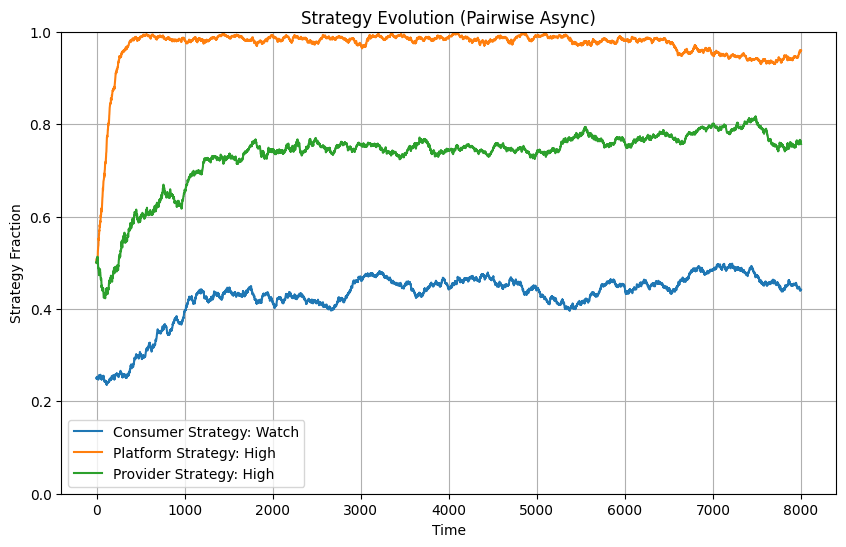

In [157]:
actions = [3,1,1]
game.plot_strategy_evol(mean_fractionss_hist, actions=actions, xlabel="Time", ylabel=f"Strategy Fraction", title=f"Strategy Evolution (Pairwise Async)")

##### Stationary Distribution

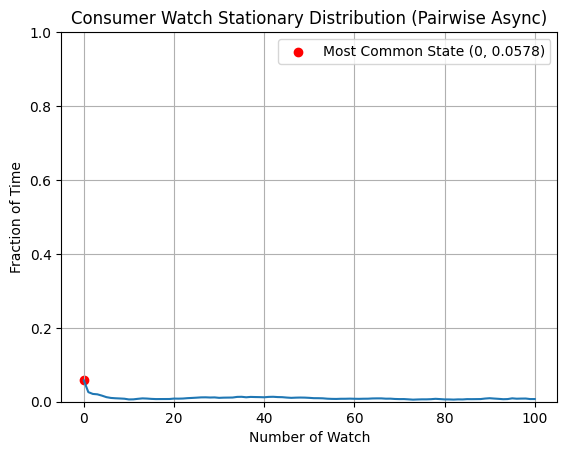

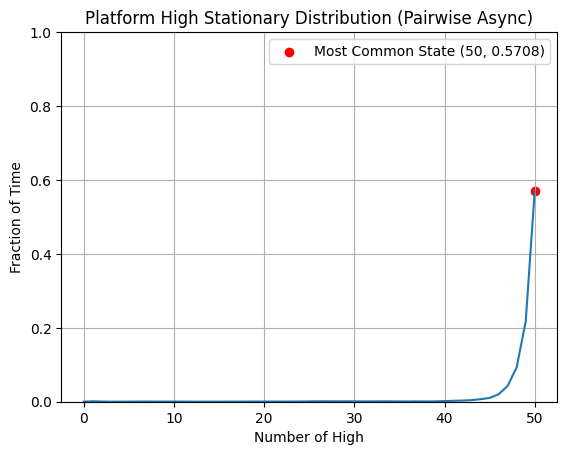

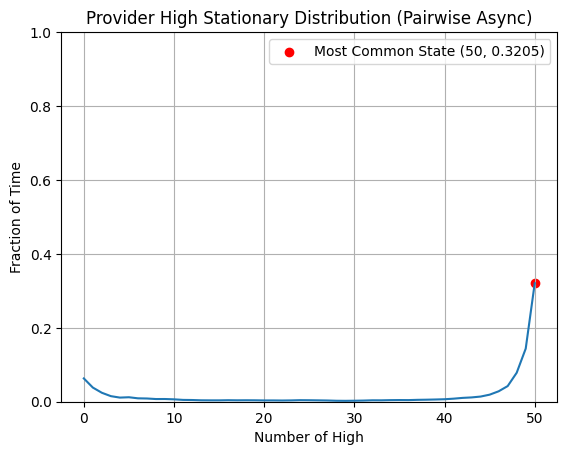

In [158]:
for player in range(len(players_names)):
    game.plot_stationary_dist(Ps_hist, player=player, action=actions[player], xlabel=f"Number of {actions_names[player][actions[player]]}", ylabel="Fraction of Time" , title=f"{players_names[player]} {actions_names[player][actions[player]]} Stationary Distribution (Pairwise Async)")

#### Pairwise Sync

In [ ]:
steps = 400
rep = 50

mean_fractionss_hist, fractionss_hist, Ps_hist = game.moran_process(process = "pairwise", sync=True, reps=rep, steps=steps, beta=2.5, mu=0.02, return_hist=True, print_rep_interval=rep//5)

##### Evolution Visualization

In [ ]:
actions = [3,1,1]
game.plot_strategy_evol(mean_fractionss_hist, actions=actions, xlabel="Time", ylabel=f"Strategy Fraction", title=f"Strategy Evolution (Pairwise Sync)")

##### Stationary Distribution

In [ ]:
for player in range(len(players_names)):
    game.plot_stationary_dist(Ps_hist, player=player, action=actions[player], xlabel=f"Number of {actions_names[player][actions[player]]}", ylabel="Fraction of Time" , title=f"{players_names[player]} {actions_names[player][actions[player]]} Stationary Distribution (Pairwise Sync)")

### Transition Matrix (Embedded Markov Chain)

In [529]:
matrix, states = game.compute_trans_matrix(beta=0.08)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


#### Embedded Markov Chain Visualization

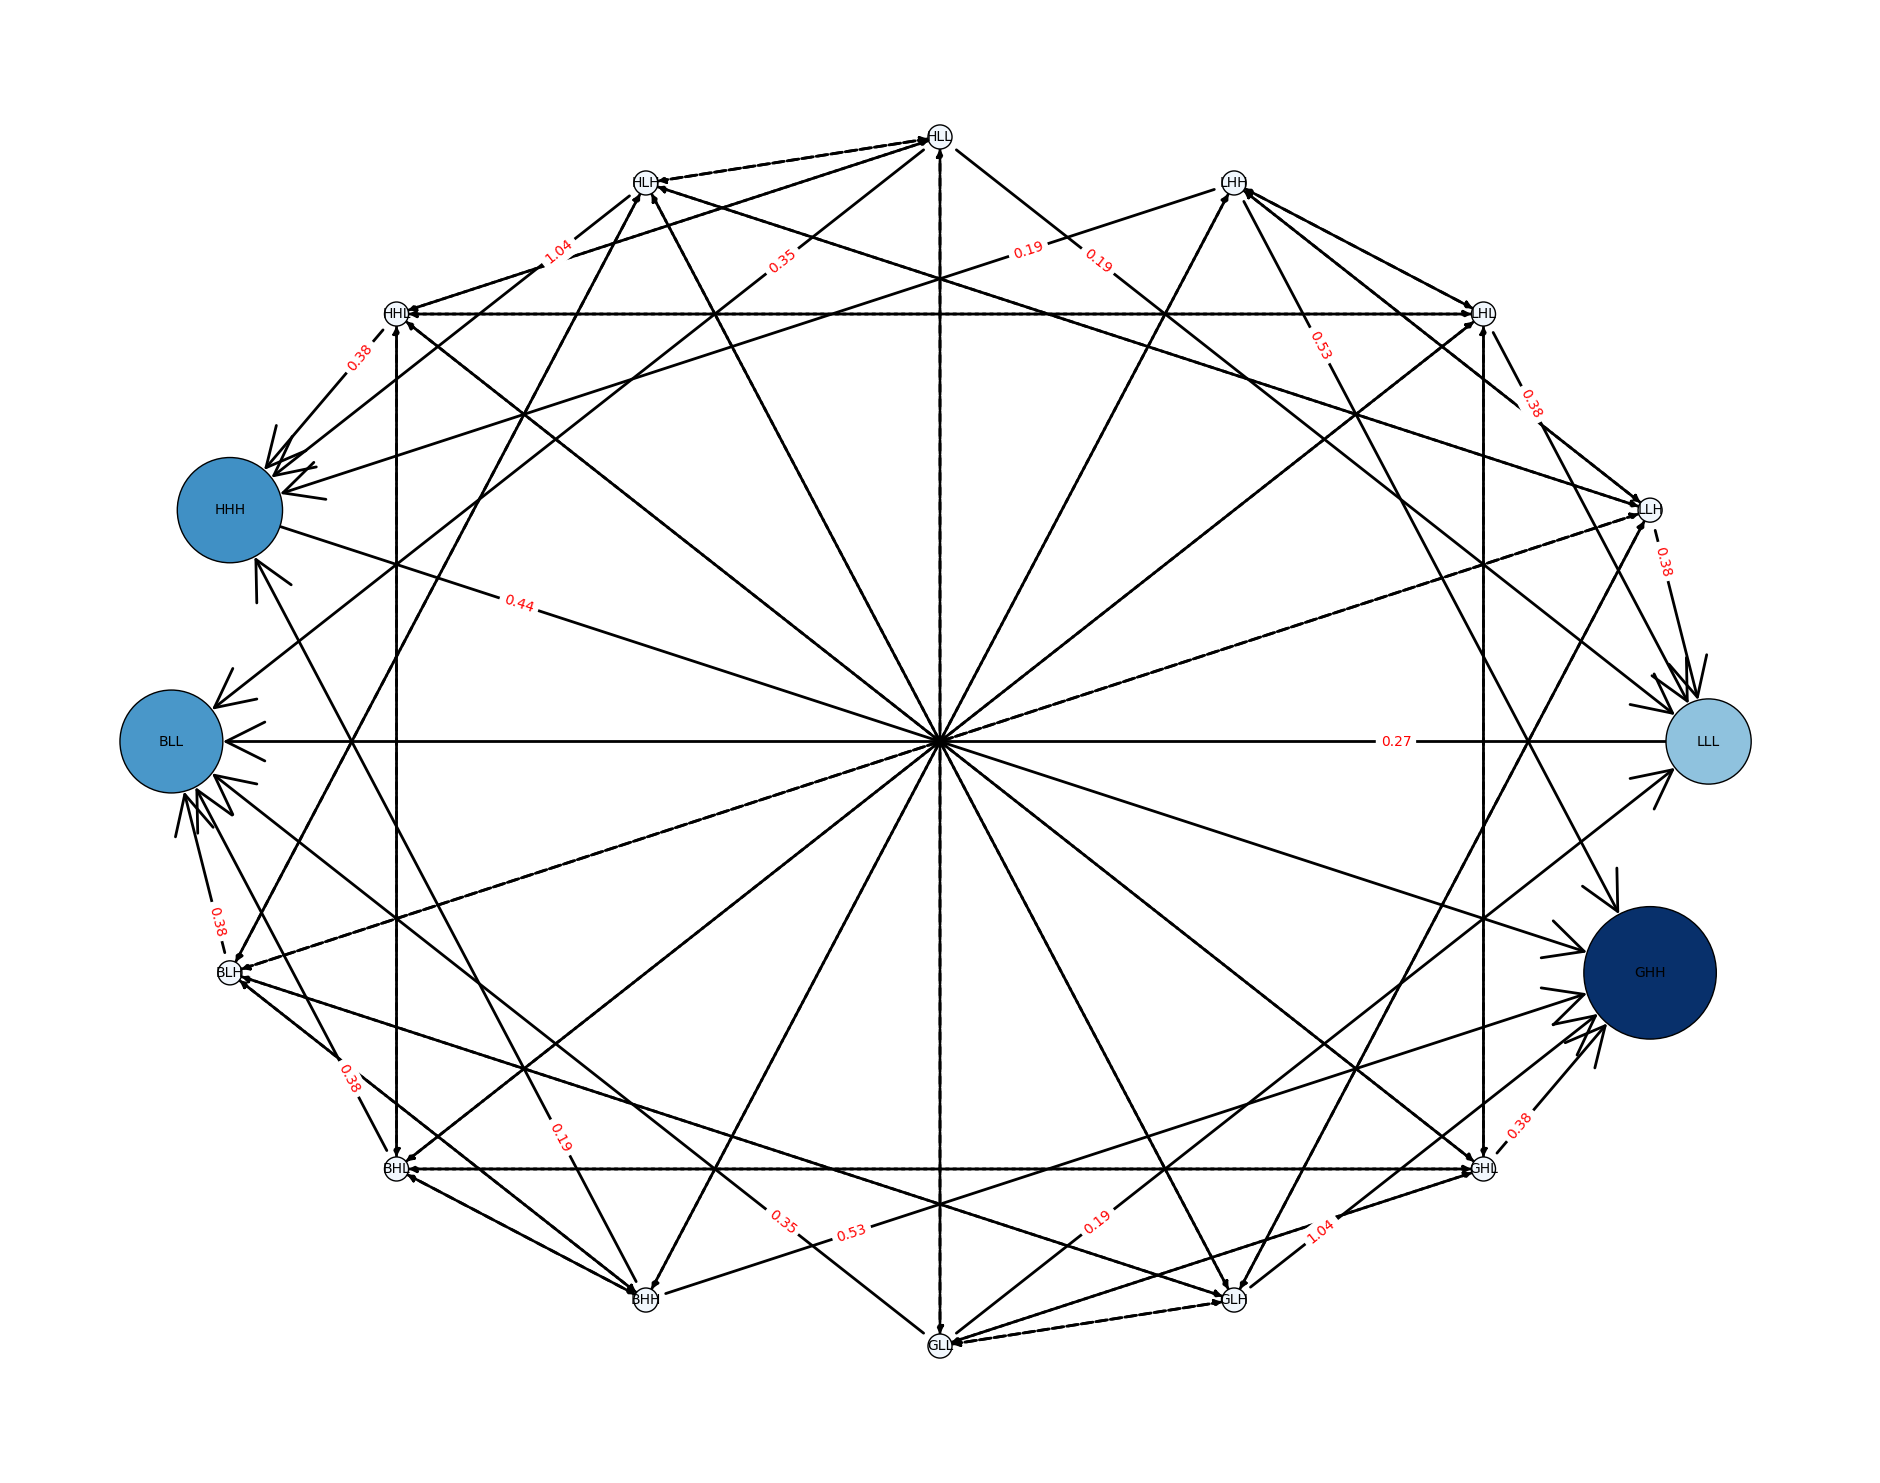

In [530]:
game.plot_transition_matrix(matrix, states=states, actions_symbols=actions_symbols, scale=40)

##### Most probable route given a starting state and an ending state

In [531]:
start_state = (0,0,0)
end_state = (1,1,1)
game.plot_transition_matrix_most_probable_route_from_i_to_j(matrix, states, actions_symbols, start_state, end_state, scale=40)

No path exists from LLL to HHH


##### Most probable route given a starting state

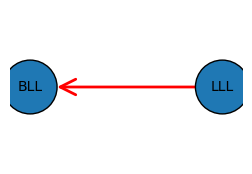

In [532]:
start_state = (0,0,0)
game.plot_transition_matrix_most_probable_route_from_i(matrix, states, actions_symbols, start_state, scale=40)

#### Stationary distrtibution from Transition Matrix 

In [533]:
stationary_distribution = game.compute_stationary_distribution(matrix)
stationary_distribution

array([0.03974609, 0.03371549, 0.03108812, 0.02003948, 0.02227867,
       0.01985572, 0.03779665, 0.03858767, 0.10982071, 0.04457924,
       0.04110528, 0.02649657, 0.03303623, 0.02944333, 0.07495759,
       0.39745315])

##### Visualize Stationary Distributions

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1), (2, 0, 0), (2, 0, 1), (2, 1, 0), (2, 1, 1), (3, 0, 0), (3, 0, 1), (3, 1, 0), (3, 1, 1)] [(1, 1, 1), (3, 1, 1)] [(0, 0, 0), (2, 0, 0)]
['red', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'green', 'red', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'green']


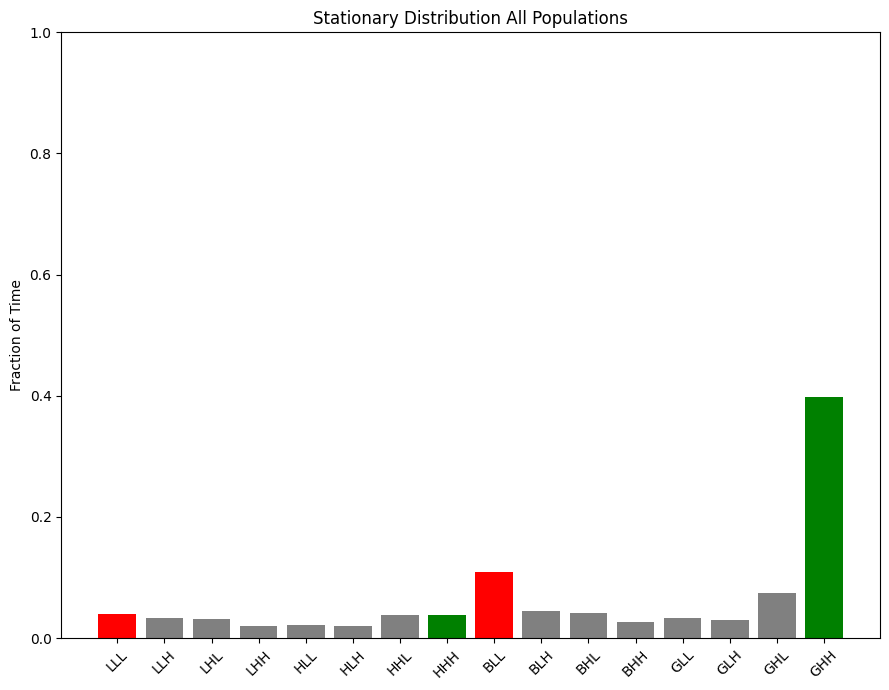

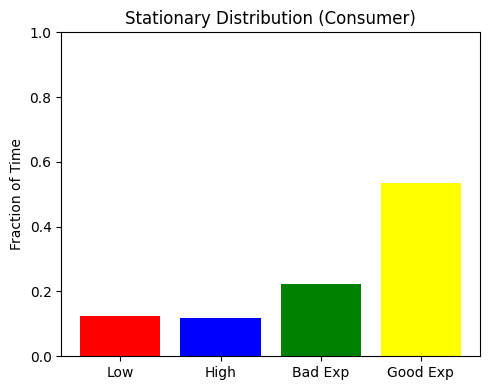

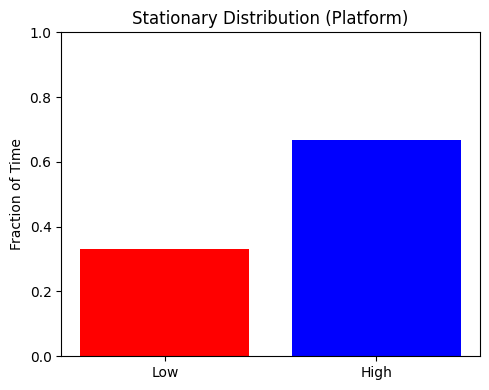

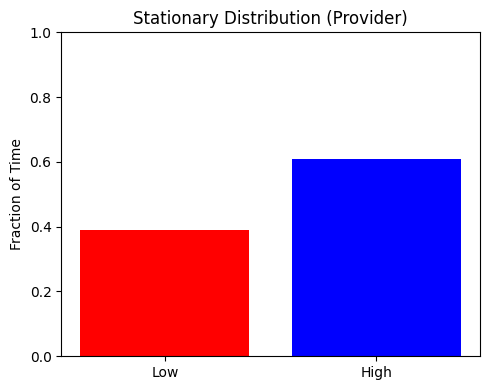

In [534]:
green = [(1,1,1), (3,1,1)]
red = [(0,0,0), (2,0,0)]

game.plot_stationary_distribution_all_pop(stationary_distribution, actions_symbols=actions_symbols, states=states, title="Stationary Distribution All Populations", ylabel="Fraction of Time", red=red, green=green)

for player in range(len(players_names)):
    game.plot_stationary_distribution_per_pop(stationary_distribution, player=player, actions_symbols=actions_symbols, states=states, title=f"Stationary Distribution ({players_names[player]})", ylabel="Fraction of Time")

### Gradient of Selection (for 3-population 2 actions games)

In [454]:
strategies_countss = [[9, 1], [9, 1], [9, 1]]

game = EGT.Game(strategies_countss=strategies_countss, payoff_matrix=payoff_matrix, actions_names=actions_names, players_names=players_names)

Ps = game.get_populations()
for i, P in enumerate(Ps):
    print(f"P{i}: {np.unique_counts(P)}")
print(game.get_payoff_matrix())

beta = 2.5
mu = 0.02
X, Y, Z, G1, G2, G3 = game.compute_gradient_of_selection(beta, mu)

Payoff matrix must must have (number of actions ^ number of player) entries


AssertionError: Invalid payoff matrix format.

#### Visualize Gradient of Selection

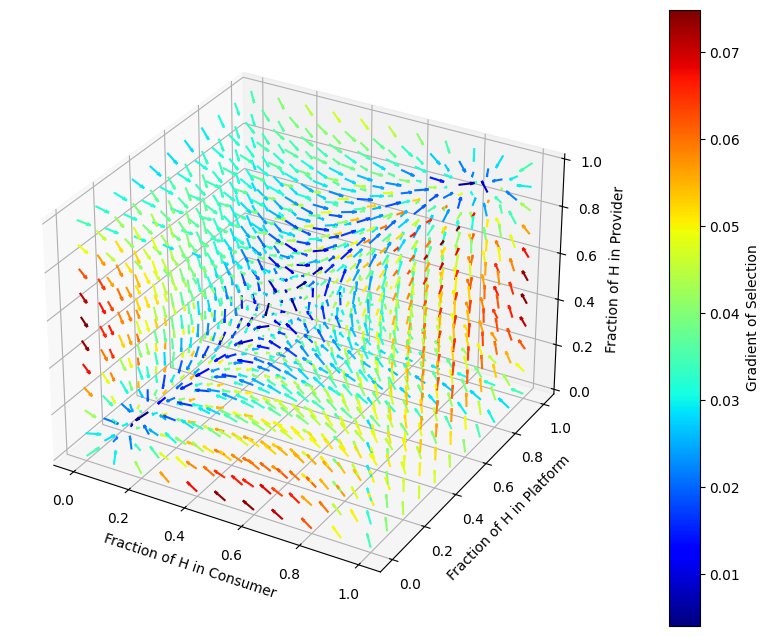

In [354]:
game.plot_gradient_of_selection(X, Y, Z, G1, G2, G3, players_names=players_names, fraction_name="H", legend="Gradient of Selection", threshold=0.00)

## Evolutionary Dynamics (Infinite Populations)

### Replicator Dynamics

In [ ]:
strategies_counts = [[50, 0], [50, 0], [49, 1]]
game = EGT.Game(strategies_countss=strategies_countss, payoff_matrix=payoff_matrix, actions_names=actions_names, players_names=players_names)

dt = 0.01
steps = 10000
strategies_fractionss_hist, gradients = game.compute_iterative_replicator_dynamics(dt, steps)

#### Visualize Replicator Dynamics Strategies Evolution

In [ ]:
game.plot_replicator_dynamics_strategies_evol(strategies_fractionss_hist)